In [1]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random
import sc_toolbox
import pertpy 

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [2]:
%%R
library(edgeR)

Loading required package: limma


# Running on XX cell types

In [3]:
adata_pb = sc.read('./pb_adata_Cupr_Mg.h5ad')
adata_pb

AnnData object with n_obs × n_vars = 44 × 16393
    obs: 'publication', 'label', 'cell_type', 'replicate_cat', 'sample', 'sample_rep', 'batch', 'lib_size', 'log_lib_size', 'replicate'
    uns: 'cell_type_colors', 'label_colors', 'log1p', 'pca', 'publication_colors', 'replicate_cat_colors', 'sample_colors', 'sample_rep_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [4]:
# Extract the data as a pandas DataFrame
df = adata_pb.obs[['cell_type', 'label']]

# Create a summary table
summary_table = df.groupby(['cell_type', 'label']).size().unstack(fill_value=0)
summary_table

label,ctrl,stim
cell_type,,
BAMs,1,4
Mg_A,3,8
Mg_B,4,9
Mg_trt,2,9
cycl,0,4


In [5]:
adata_pb.obs

,publication,label,cell_type,replicate_cat,sample,sample_rep,batch,lib_size,log_lib_size,replicate
donor_ctrl_3_0-0-0-0-0,Shen et al. 2021,ctrl,Mg_A,3,ctrl_3,Cupr_ctrl_Shen_2,0,240640,12.391057,3
donor_ctrl_4_0-0-0-0-0,Shen et al. 2021,ctrl,Mg_A,4,ctrl_4,Cupr_ctrl_Shen_1,0,3305175,15.011000,4
donor_ctrl_5_0-0-0-0-0,Shen et al. 2021,ctrl,Mg_A,5,ctrl_5,Cupr_ctrl_Shen_3,0,2702141,14.809555,5
donor_stim_2_0-0-0-0-0,(this study),stim,Mg_A,2,stim_2,Cupr_5w_2,0,33969,10.433204,2
donor_stim_3_0-0-0-0-0,Shen et al. 2021,stim,Mg_A,3,stim_3,Cupr_4+3w_1,0,125431,11.739511,3
donor_stim_4_0-0-0-0-0,Shen et al. 2021,stim,Mg_A,4,stim_4,Cupr_4w_3,0,374477,12.833286,4
donor_stim_5_0-0-0-0-0,Shen et al. 2021,stim,Mg_A,5,stim_5,Cupr_4w_2,0,1225910,14.019194,5
donor_stim_6_0-0-0-0-0,Shen et al. 2021,stim,Mg_A,6,stim_6,Cupr_4+3w_3,0,592483,13.292077,6
donor_stim_7_0-0-0-0-0,Shen et al. 2021,stim,Mg_A,7,stim_7,Cupr_4w_4,0,1303272,14.080389,7
donor_stim_8_0-0-0-0-0,Shen et al. 2021,stim,Mg_A,8,stim_8,Cupr_4+3w_2,0,5664177,15.549672,8


In [6]:
adata_sub= adata_pb[np.in1d(adata_pb.obs['cell_type'], 
                           ['Mg_A', 'Mg_trt'])].copy()

print("Dimensions of adata_sub:", adata_sub.shape)

Dimensions of adata_sub: (22, 16393)


In [7]:
pub_map = {
    '(this study)': 'Adams',
    'Shen et al. 2021': 'Shen'
}

# Update the 'treatment_meta' column based on the mapping
adata_sub.obs['batch'] = adata_sub.obs['publication'].map(pub_map)

In [8]:
# Concatenate 'individual_lesion_condition' and 'replicate' to create 'sample'
adata_sub.obs['cell_type_sample'] = adata_sub.obs['cell_type'].astype(str) + '_' + adata_sub.obs['sample_rep'].astype(str)

In [9]:
adata_sub.obs[:5]

,publication,label,cell_type,replicate_cat,sample,sample_rep,batch,lib_size,log_lib_size,replicate,cell_type_sample
donor_ctrl_3_0-0-0-0-0,Shen et al. 2021,ctrl,Mg_A,3,ctrl_3,Cupr_ctrl_Shen_2,Shen,240640,12.391057,3,Mg_A_Cupr_ctrl_Shen_2
donor_ctrl_4_0-0-0-0-0,Shen et al. 2021,ctrl,Mg_A,4,ctrl_4,Cupr_ctrl_Shen_1,Shen,3305175,15.011000,4,Mg_A_Cupr_ctrl_Shen_1
donor_ctrl_5_0-0-0-0-0,Shen et al. 2021,ctrl,Mg_A,5,ctrl_5,Cupr_ctrl_Shen_3,Shen,2702141,14.809555,5,Mg_A_Cupr_ctrl_Shen_3
donor_stim_2_0-0-0-0-0,(this study),stim,Mg_A,2,stim_2,Cupr_5w_2,Adams,33969,10.433204,2,Mg_A_Cupr_5w_2
donor_stim_3_0-0-0-0-0,Shen et al. 2021,stim,Mg_A,3,stim_3,Cupr_4+3w_1,Shen,125431,11.739511,3,Mg_A_Cupr_4+3w_1


# Subset for demyelination and remyelination MOL2 data

In [10]:
# Unique values in the 'condition' column
unique_conditions = adata_sub.obs['cell_type_sample'].unique()
for condition in unique_conditions:
    print(condition)

Mg_A_Cupr_ctrl_Shen_2
Mg_A_Cupr_ctrl_Shen_1
Mg_A_Cupr_ctrl_Shen_3
Mg_A_Cupr_5w_2
Mg_A_Cupr_4+3w_1
Mg_A_Cupr_4w_3
Mg_A_Cupr_4w_2
Mg_A_Cupr_4+3w_3
Mg_A_Cupr_4w_4
Mg_A_Cupr_4+3w_2
Mg_A_Cupr_4w_1
Mg_trt_Cupr_ctrl_Shen_1
Mg_trt_Cupr_ctrl_Shen_3
Mg_trt_Cupr_5w_1
Mg_trt_Cupr_5w_2
Mg_trt_Cupr_4+3w_1
Mg_trt_Cupr_4w_3
Mg_trt_Cupr_4w_2
Mg_trt_Cupr_4+3w_3
Mg_trt_Cupr_4w_4
Mg_trt_Cupr_4+3w_2
Mg_trt_Cupr_4w_1


In [11]:
adata_sub= adata_sub[np.in1d(adata_sub.obs['cell_type_sample'], 
                           [
                            'Mg_A_Cupr_ctrl_Shen_2',
                            'Mg_A_Cupr_ctrl_Shen_1',
                            'Mg_A_Cupr_ctrl_Shen_3',
                            'Mg_trt_Cupr_5w_1',
                            'Mg_trt_Cupr_5w_2',
                            'Mg_trt_Cupr_4w_3',
                            'Mg_trt_Cupr_4w_2',
                            'Mg_trt_Cupr_4w_4',
                            'Mg_trt_Cupr_4w_1'
                           ])].copy()

print("Dimensions of adata_sub:", adata_sub.shape)

Dimensions of adata_sub: (9, 16393)


In [12]:
# Check if the 'sample_rep' column exists
if 'sample_rep' in adata_sub.obs.columns:
    # Set the 'sample_rep' column as the index
    adata_sub.obs.set_index('sample_rep', inplace=True)
else:
    print("The column 'sample_rep' does not exist in adata_sub.obs.")

adata_sub.obs.index.name = None

In [13]:
adata_sub.obs

,publication,label,cell_type,replicate_cat,sample,batch,lib_size,log_lib_size,replicate,cell_type_sample
Cupr_ctrl_Shen_2,Shen et al. 2021,ctrl,Mg_A,3,ctrl_3,Shen,240640,12.391057,3,Mg_A_Cupr_ctrl_Shen_2
Cupr_ctrl_Shen_1,Shen et al. 2021,ctrl,Mg_A,4,ctrl_4,Shen,3305175,15.011000,4,Mg_A_Cupr_ctrl_Shen_1
Cupr_ctrl_Shen_3,Shen et al. 2021,ctrl,Mg_A,5,ctrl_5,Shen,2702141,14.809555,5,Mg_A_Cupr_ctrl_Shen_3
Cupr_5w_1,(this study),stim,Mg_trt,1,stim_1,Adams,128565,11.764190,1,Mg_trt_Cupr_5w_1
Cupr_5w_2,(this study),stim,Mg_trt,2,stim_2,Adams,692552,13.448139,2,Mg_trt_Cupr_5w_2
Cupr_4w_3,Shen et al. 2021,stim,Mg_trt,4,stim_4,Shen,2202365,14.605042,4,Mg_trt_Cupr_4w_3
Cupr_4w_2,Shen et al. 2021,stim,Mg_trt,5,stim_5,Shen,23148994,16.957462,5,Mg_trt_Cupr_4w_2
Cupr_4w_4,Shen et al. 2021,stim,Mg_trt,7,stim_7,Shen,2058837,14.537652,7,Mg_trt_Cupr_4w_4
Cupr_4w_1,Shen et al. 2021,stim,Mg_trt,9,stim_9,Shen,39342695,17.487821,9,Mg_trt_Cupr_4w_1


# Rename the MOL clusters for NEW letter based nomenclature

In [14]:
#Check the counts data
print(adata_sub.X[:5, :5])

[[  0   0   0   0   0]
 [  2 106   4  48  48]
 [  0  71   3  48  29]
 [  0   0   1   1   5]
 [  6   0   6   3  22]]


# Start R code: QC of log transformation

In [15]:
%%R -i adata_sub

# Concatenate label and cell type for group factor
group <- colData(adata_sub)$label #ctrl or stim
replicate <- colData(adata_sub)$replicate #replicate number
batch <- colData(adata_sub)$batch

treatments <- data.frame("Group"=group, "Reps"=replicate, "Batch"= batch)
print(treatments)

                 Group Reps Batch
Cupr_ctrl_Shen_2  ctrl    3  Shen
Cupr_ctrl_Shen_1  ctrl    4  Shen
Cupr_ctrl_Shen_3  ctrl    5  Shen
Cupr_5w_1         stim    1 Adams
Cupr_5w_2         stim    2 Adams
Cupr_4w_3         stim    4  Shen
Cupr_4w_2         stim    5  Shen
Cupr_4w_4         stim    7  Shen
Cupr_4w_1         stim    9  Shen


In [16]:
%%R

#Create a DGElist object using the anndata counts in 'X'
x <- DGEList(assay(adata_sub, "X"), group=colData(adata_sub)$label)

samplenames <- colnames(x$counts)

print("Dimensions before subsetting:")
print(dim(x))

# Check counts per group before filtering
print(table(x$samples$group))

[1] "Dimensions before subsetting:"
[1] 16393     9

ctrl stim 
   3    6 


In [18]:
%%R

cd <- x$samples$group
print(cd)

# Adjust for batch-- ie publication in the model matrix
design <- model.matrix(~0 + cd)
print(design)

[1] ctrl ctrl ctrl stim stim stim stim stim stim
Levels: ctrl stim
  cdctrl cdstim
1      1      0
2      1      0
3      1      0
4      0      1
5      0      1
6      0      1
7      0      1
8      0      1
9      0      1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$cd
[1] "contr.treatment"



In [19]:
%%R

# More strict removal of genes, tried group, pub and batch
keep.expr <- filterByExpr(x, design)
x2 <- x[keep.expr,, keep.lib.sizes=FALSE]
dim(x2)

[1] 10148     9


In [20]:
%%R

## OLD DON"T USE THIS

keep.exprs <- filterByExpr(x, group=batch)
b <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(b)

[1] 11202     9


In [21]:
%%R
#X is before trimming, Y is after trimming
L <- mean(x2$samples$lib.size) * 1e-6
M <- median(x2$samples$lib.size) * 1e-6
c(L, M)

[1] 8.164245 2.191877


In [22]:
%%R
## Calc norm factors before to normalize library sizes, then cpm divides counts by lib sizes
#X is before trimming, Y is after trimming, X2 is also trimmed but differently
x2 <- calcNormFactors(x2, method = "TMM")
x2$samples$norm.factors

[1] 1.0363118 1.0876925 0.9818567 1.9042280 1.4978446 0.7340890 0.7805520
[8] 0.7687696 0.7191555


In [23]:
%%R
#X2 is the norm lib sizes and trimmed
cpm <- edgeR::cpm(x2, log=FALSE, prior.counts=3)
lcpm <- edgeR::cpm(x2, log=TRUE, prior.count=3)

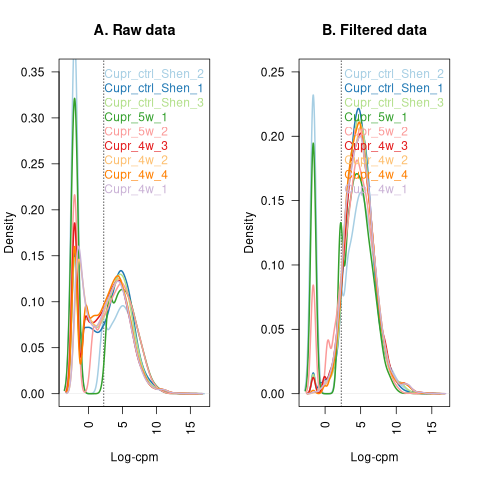

In [24]:
%%R
lcpm.cutoff <- log2(10/M + 2/L)
library(RColorBrewer)
nsamples <- ncol(x2)
col <- brewer.pal(nsamples, "Paired")

par(mfrow=c(1,2))

lcpm <- edgeR::cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.35), las=2, main="", xlab="")
title(main="A. Raw data", xlab="Log-cpm")
abline(v=lcpm.cutoff, lty=3)
for (i in 2:nsamples){
  den <- density(lcpm[,i])
  lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

lcpm <- edgeR::cpm(x2, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.25), las=2, main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=lcpm.cutoff, lty=3)
for (i in 2:nsamples){
  den <- density(lcpm[,i])
  lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

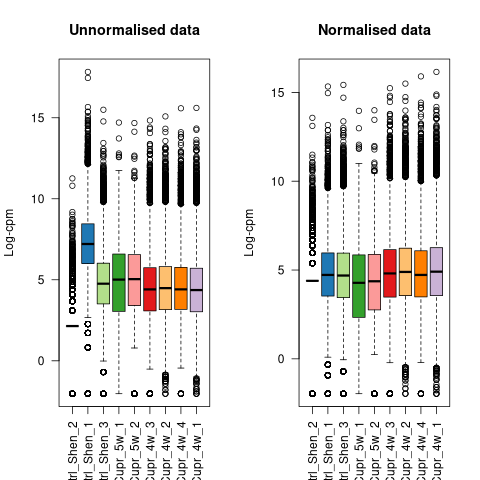

In [25]:
%%R
y2 <- x2
y2$samples$norm.factors <- 1
y2$counts[,1] <- ceiling(y2$counts[,1]*0.05)
y2$counts[,2] <- y2$counts[,2]*5

par(mfrow=c(1,2))
lcpm <- edgeR::cpm(y2, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="Unnormalised data", ylab="Log-cpm")

y3 <- calcNormFactors(y2)
y3$samples$norm.factors

lcpm <- edgeR::cpm(y3, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="Normalised data", ylab="Log-cpm")

# Show how log transf + batch removal affects the separation of samples:

In [26]:
%%R
cd <- x2$samples$group
print(cd)

[1] ctrl ctrl ctrl stim stim stim stim stim stim
Levels: ctrl stim


In [27]:
%%R
#Make new count matrix with log counts and DGE data from X2 (trimmed, normfactors)
x3 <- x2
x3$counts <- lcpm

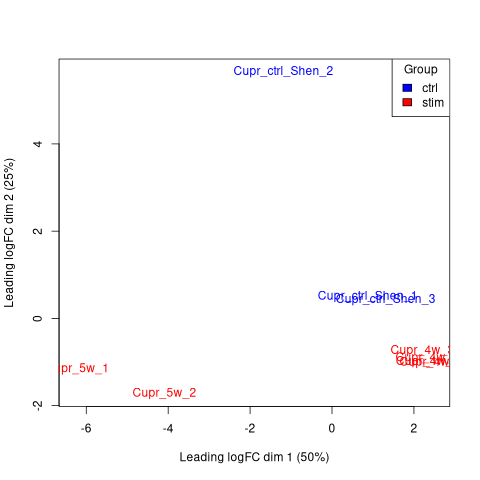

In [28]:
%%R
# Assuming 'group' is stored in y$samples dataframe
group <- x2$samples$group

# Generate a numeric vector from group factors (if not already factor, convert it)
group_factor <- as.factor(group)
group_colors <- as.numeric(group_factor)  # This converts factors to unique integers

# Define a set of colors corresponding to the factors
# Example: If you have two groups, you could define two colors
colors <- c("blue", "red")  # Adjust the number and colors based on your actual groups

# Use these colors in your plotMDS
plotMDS(x2, col = colors[group_colors])

# Adding a legend for clarity
legend("topright", legend=levels(group_factor), fill=colors, title="Group")

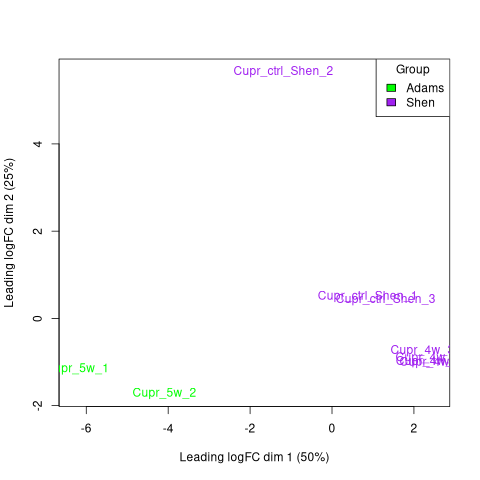

In [29]:
%%R
# Generate a numeric vector from group factors (if not already factor, convert it)
pub_factor <- as.factor(batch)
pub_colors <- as.numeric(pub_factor)  # This converts factors to unique integers

# Define a set of colors corresponding to the factors
# Example: If you have two groups, you could define two colors
colors <- c("green", "purple")  # Adjust the number and colors based on your actual groups

# Use these colors in your plotMDS
plotMDS(x2, col = colors[pub_colors])

# Adding a legend for clarity
legend("topright", legend=levels(pub_factor), fill=colors, title="Group")

In [30]:
%%R

x3$samples

                 group lib.size norm.factors
Cupr_ctrl_Shen_2  ctrl   239498    1.0363118
Cupr_ctrl_Shen_1  ctrl  3282979    1.0876925
Cupr_ctrl_Shen_3  ctrl  2684498    0.9818567
Cupr_5w_1         stim   124962    1.9042280
Cupr_5w_2         stim   673402    1.4978446
Cupr_4w_3         stim  2191877    0.7340890
Cupr_4w_2         stim 23046569    0.7805520
Cupr_4w_4         stim  2047985    0.7687696
Cupr_4w_1         stim 39186436    0.7191555


In [31]:
%%R
# Adjust for batch-- ie publication in the model matrix
design <- model.matrix(~0 + cd)
design

  cdctrl cdstim
1      1      0
2      1      0
3      1      0
4      0      1
5      0      1
6      0      1
7      0      1
8      0      1
9      0      1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$cd
[1] "contr.treatment"



In [32]:
%%R
contr.matrix <- makeContrasts(cdstim - cdctrl, levels = colnames(design))
contr.matrix

        Contrasts
Levels   cdstim - cdctrl
  cdctrl              -1
  cdstim               1


In [33]:
%%R
# Convert to CPM and log2 transformation. 
logCPM <- edgeR::cpm(x2, log=TRUE, prior.count=3)

In [34]:
%%R
#Batch is set to the publication of origin to remove effects between sample origins
logCPM_no_batch <- removeBatchEffect(logCPM, batch=batch) 

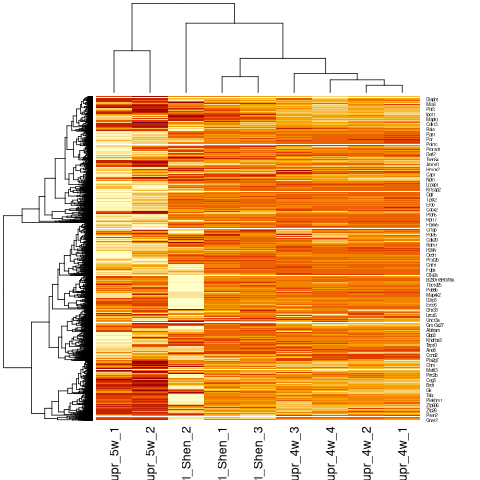

In [35]:
%%R
heatmap(logCPM)

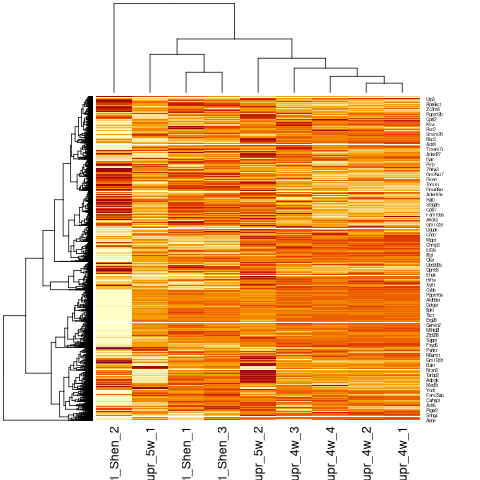

In [36]:
%%R
heatmap(logCPM_no_batch)

# Voom with quality weights

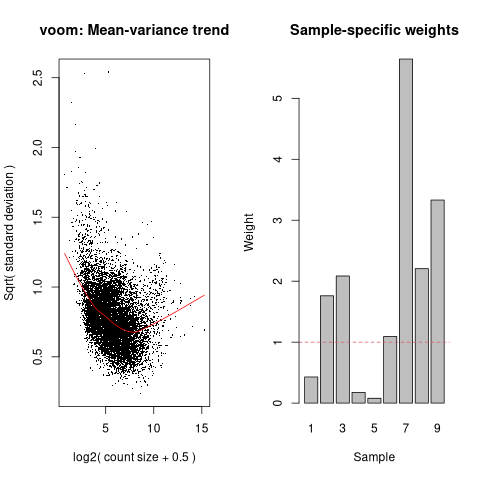

In [37]:
%%R
y <- voomWithQualityWeights(x2$counts, design, plot=TRUE)

In [38]:
%%R
corfit <- duplicateCorrelation(y, design, block=batch)
corfit$consensus.correlation

[1] 0.376321


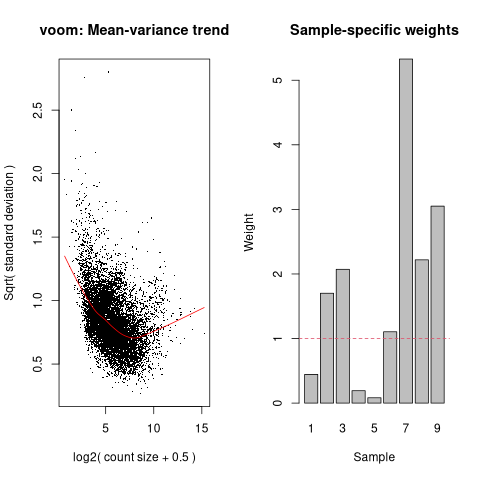

In [39]:
%%R
y2 <- voomWithQualityWeights(x2$counts, design, plot=TRUE, block=batch, correlation=corfit$consensus)

In [40]:
%%R
corfit2 <- duplicateCorrelation(y2,design,block=batch, weights=y2$targets$sample.weights)
corfit2$consensus.correlation

[1] 0.5923169


In [41]:
%%R
fit <- lmFit(y2, design, block=batch, correlation=corfit2$consensus)

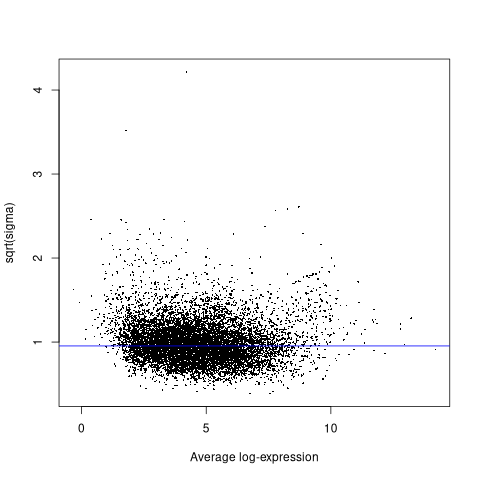

In [42]:
%%R
contr <- makeContrasts(cdstim - cdctrl, levels = colnames(coef(fit)))
tmp <- contrasts.fit(fit, contr)
tmp2 <- eBayes(tmp)

plotSA(tmp2, xlab = "Average log-expression", ylab = "sqrt(sigma)", zero.weights = FALSE,
       pch = 16, cex = 0.3, col = c("black","red"))

In [43]:
%%R
# Retrieve the top results without sorting by p-value directly
tt <- topTable(tmp2, sort.by = "P", n = Inf)
head(tt, 10)

            logFC   AveExpr         t      P.Value    adj.P.Val        B
Lpl      6.400062  7.558633  35.10537 3.170601e-13 3.217526e-09 19.45604
Gp9     -4.315409  2.874037 -31.47961 1.121661e-12 5.691310e-09 19.50572
Upk1b   -4.717137  3.372472 -28.52588 3.505037e-12 1.036718e-08 18.47025
Apoe     6.265309 12.951242  28.14930 4.086393e-12 1.036718e-08 17.78625
Gm32036 -3.383772  4.617496 -27.05140 6.467257e-12 1.312594e-08 17.86873
Ggt5    -3.008927  3.185956 -26.02800 1.008731e-11 1.706101e-08 17.39903
Tspan18 -4.415044  2.519756 -25.00664 1.599265e-11 2.318478e-08 16.96975
Tmem52  -2.892146  2.837396 -24.26594 2.259807e-11 2.471235e-08 16.63914
Bank1   -4.825882  3.695166 -24.19657 2.335387e-11 2.471235e-08 16.65762
Gimap6  -2.991568  4.550494 -24.06120 2.490890e-11 2.471235e-08 16.58056


In [44]:
%%R
length(which(tt$adj.P.Val < 0.05))

[1] 6354


In [45]:
%%R
# Calculate the number of genes with adj.P.Val < 0.05 and |logFC| > 1
significant_genes <- tt[tt$adj.P.Val < 0.05 & abs(tt$logFC) > 0.7, ]
num_significant_genes <- nrow(significant_genes)

# Print the number of significant genes
print(num_significant_genes)

[1] 4825


In [46]:
%%R
# Calculate the number of genes with adj.P.Val < 0.05 and |logFC| > 1
significant_genes <- tt[tt$adj.P.Val < 0.05 & abs(tt$logFC) > 1, ]
num_significant_genes <- nrow(significant_genes)

# Print the number of significant genes
print(num_significant_genes)

[1] 3201


In [47]:
%%R
# Calculate the number of genes with adj.P.Val < 0.05 and |logFC| > 1
genes_up <- tt[tt$adj.P.Val < 0.05 & tt$logFC > 1, ]
num_genes_up <- nrow(genes_up)

# Print the number of significant genes
print(num_genes_up)

genes_up_sorted <- genes_up[order(genes_up$logFC, decreasing = TRUE), ]

# View the head of the significant genes data frame
head(genes_up_sorted)

[1] 738
          logFC  AveExpr         t      P.Value    adj.P.Val        B
Spp1  12.264981 7.114855 14.360864 8.643897e-09 6.614749e-07 8.493057
Gpnmb 10.467026 4.762201  8.530982 2.303635e-06 2.656511e-05 4.427667
Apoc2  9.888681 3.504383 12.060093 5.914091e-08 2.182407e-06 6.778746
Apoc4  9.518047 3.535830 10.225995 3.489392e-07 6.956848e-06 5.731450
Apoc1  9.080148 4.818993 12.647794 3.515847e-08 1.621905e-06 7.313361
Olr1   9.027889 3.223617  9.290038 9.570695e-07 1.389462e-05 5.087532


In [48]:
%%R
if ('Serpina3n' %in% rownames(genes_up_sorted)) {
    print("Serpina3n is in the index of genes_up_sorted")
} else {
    print("Serpina3n is not in the index of genes_up_sorted")
}

[1] "Serpina3n is not in the index of genes_up_sorted"


In [49]:
%%R
# Calculate the number of genes with adj.P.Val < 0.05 and |logFC| > 1
genes_down <- tt[tt$adj.P.Val < 0.05 & tt$logFC < -1, ]
num_genes_down <- nrow(genes_down)

# Print the number of significant genes
print(num_genes_down)

genes_down_sorted <- genes_down[order(genes_down$logFC, decreasing = FALSE), ]

# View the head of the significant genes data frame
head(genes_down_sorted)

[1] 2463
            logFC    AveExpr          t      P.Value    adj.P.Val         B
Gm11523 -7.925492 -0.3240743  -8.942594 1.420627e-06 1.882052e-05  5.760607
Nhs     -7.018634  0.8554175  -8.007983 4.368208e-06 4.100700e-05  4.577037
Tsix    -6.268545  0.8027462  -3.662546 3.382817e-03 7.414433e-03 -1.914070
Ptger3  -6.158859  0.5890153 -13.081178 2.428143e-08 1.283294e-06  9.758090
Rasgrp4 -6.086763  0.9093841 -11.312456 1.183932e-07 3.366609e-06  8.198604
Slc5a10 -5.824737  0.7212842 -14.918962 5.652333e-09 4.944817e-07 11.197048


# Save output- make sure to rename!

In [50]:
%%R
# Add row names as a new column
tt$gene <- rownames(tt)

# Optionally reorder or select columns
tt <- tt[, c("gene", names(tt)[1:6])]

# Write to CSV file
write.table(tt, file = "./files/Cupr_demyel_Mg_A_v_trt_voom_wqw_NEW.csv", row.names = FALSE, sep = ",", quote = FALSE)

# Do results overlap with LR pairs?

In [51]:
import liana as li
lr_pairs = li.resource.select_resource('mouseconsensus')
lr_pairs.head()

,ligand,receptor
31371,Dll1,Notch1
31372,Dll1,Notch2
31373,Dll1,Notch4
31374,Dll1,Notch3
31375,Nrg2,Erbb2_Erbb3


In [52]:
DEG_all = pd.read_csv('./files/Cupr_demyel_Mg_A_v_trt_voom_wqw_NEW.csv', index_col=None)
DEG_all.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
DEG_all.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
DEG_all.shape

(10148, 7)

In [53]:
sigs = DEG_all[(DEG_all.Padj < 0.05) & (abs(DEG_all.logFC) >= 1)]
sigs.shape

(3201, 7)

In [54]:
# Step 1: Convert ligands and receptors to a list
ligands = lr_pairs['ligand'].tolist()
receptors = lr_pairs['receptor'].tolist()

# Step 2: Filter DEGs from 'sigs'
degs = set(sigs['gene'])  # Create a set for faster lookup

# Step 3: Check which ligand-receptor pairs have both ligands and receptors as DEGs
matched_pairs = lr_pairs[(lr_pairs['ligand'].isin(degs)) & (lr_pairs['receptor'].isin(degs))]

# Step 4: Count the matched pairs
num_matched_pairs = matched_pairs.shape[0]

# Output the result
print(f'Total ligand-receptor pairs where both are differentially expressed: {num_matched_pairs}')

# Step 5: Optional - view the matched pairs with direction of change
matched_pairs_with_logFC = matched_pairs.merge(sigs[['gene', 'logFC']], left_on='ligand', right_on='gene', how='left')\
                                        .merge(sigs[['gene', 'logFC']], left_on='receptor', right_on='gene', how='left', suffixes=('_ligand', '_receptor'))

# Sorting the table by 'logFC_ligand' in descending order
sorted_table = matched_pairs_with_logFC.sort_values(by='logFC_ligand', ascending=False)

# Displaying the sorted table with the selected columns
sorted_table[['ligand', 'receptor', 'logFC_ligand', 'logFC_receptor']]

Total ligand-receptor pairs where both are differentially expressed: 76


,ligand,receptor,logFC_ligand,logFC_receptor
23,Spp1,Ptger4,12.264981,4.239336
22,Spp1,Cd44,12.264981,5.921278
14,Apoc2,Ldlr,9.888681,1.005477
18,Igf1,Insr,8.943051,-1.012795
71,Lgals3,Eng,7.614927,-2.334923
...,...,...,...,...
68,Il16,Kcnd1,-2.274996,-2.003985
27,Il16,Ccr5,-2.274996,-2.400501
29,Hbegf,Cd44,-2.403798,5.921278
37,Hbegf,Cd9,-2.403798,1.570113


In [55]:
sigs_up = DEG_all[(DEG_all.Padj < 0.05) & (DEG_all.logFC >= 1)]
sigs_up.shape

(738, 7)

In [56]:
# Step 1: Convert ligands and receptors to a list
ligands = lr_pairs['ligand'].tolist()
receptors = lr_pairs['receptor'].tolist()

# Step 2: Filter DEGs from 'sigs'
degs = set(sigs_up['gene'])  # Create a set for faster lookup

# Step 3: Check which ligand-receptor pairs have both ligands and receptors as DEGs
matched_pairs = lr_pairs[(lr_pairs['ligand'].isin(degs)) & (lr_pairs['receptor'].isin(degs))]

# Step 4: Count the matched pairs
num_matched_pairs = matched_pairs.shape[0]

# Output the result
print(f'Total ligand-receptor pairs where both are differentially expressed: {num_matched_pairs}')

# Step 5: Optional - view the matched pairs with direction of change
matched_pairs_with_logFC = matched_pairs.merge(sigs[['gene', 'logFC']], left_on='ligand', right_on='gene', how='left')\
                                        .merge(sigs[['gene', 'logFC']], left_on='receptor', right_on='gene', how='left', suffixes=('_ligand', '_receptor'))

# Sorting the table by 'logFC_ligand' in descending order
sorted_table = matched_pairs_with_logFC.sort_values(by='logFC_ligand', ascending=False)

# Displaying the sorted table with the selected columns
sorted_table[['ligand', 'receptor', 'logFC_ligand', 'logFC_receptor']]

Total ligand-receptor pairs where both are differentially expressed: 36


,ligand,receptor,logFC_ligand,logFC_receptor
12,Spp1,Cd44,12.264981,5.921278
13,Spp1,Ptger4,12.264981,4.239336
7,Apoc2,Ldlr,9.888681,1.005477
5,Cxcl14,Cxcr4,7.373248,7.472072
4,Fn1,Plaur,7.182711,2.081034
3,Fn1,Cd44,7.182711,5.921278
24,Mmp12,Plaur,7.061203,2.081034
0,Anxa2,Tlr2,6.518178,2.330903
30,Lpl,Cd44,6.400062,5.921278
6,Apoe,Ldlr,6.265309,1.005477


In [57]:
sorted_table[['ligand', 'receptor', 'logFC_ligand', 'logFC_receptor']].to_csv('LR_Cupr_de_trt1_NEW.csv', sep='\t', index=False)